Перші 5 рядків:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Пропущені значення:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Кількість дублікатів: 0

Унікальні значення 'sex': [ 0.05068012 -0.04464164]

Типи даних:
age       float64
sex   

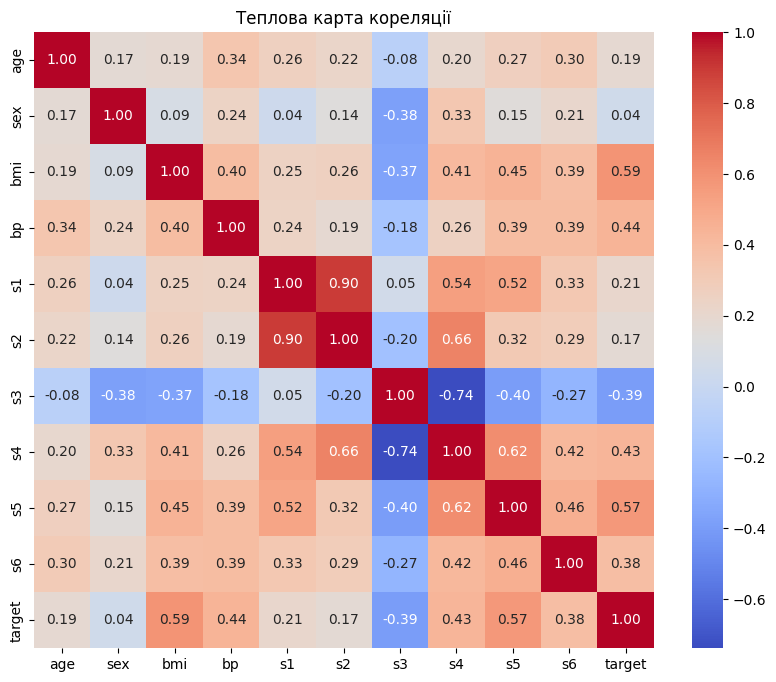


Метрики:
Linear Regression R²: 0.4526027629719196
Linear Regression MSE: 2900.1936284934804
Random Forest R²: 0.44074575666493343
Random Forest MSE: 2963.013847191012


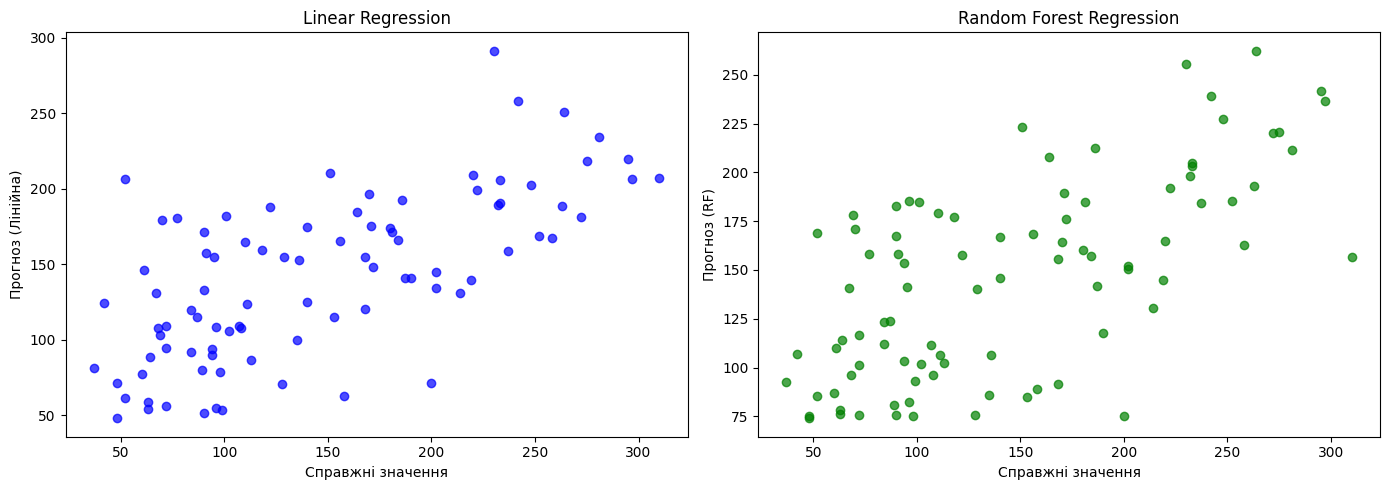


Порівняння (перші 10 рядків):
   Справжнє  Прогноз ЛР  Прогноз RF
0     219.0  139.547558      144.66
1      70.0  179.517208      171.05
2     202.0  134.038756      150.62
3     230.0  291.417029      255.36
4     111.0  123.789659      106.39
5      84.0   92.172347      123.51
6     242.0  258.232389      238.99
7     272.0  181.337321      220.16
8      94.0   90.224113      153.44
9      96.0  108.633759      185.15

ВИСНОВКИ:
- Найбільш корелююча ознака: bmi
- Лінійна регресія показала трохи кращий результат, ніж RandomForest
- Моделі показують помірну здатність передбачення прогресу діабету


In [1]:
# 1. Завантаження бібліотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Завантаження датасету
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# 1. Перших 5 рядків
print("Перші 5 рядків:")
print(df.head())

# 2. Перевірка пропущених значень
print("\nПропущені значення:")
print(df.isnull().sum())

# 3. Перевірка дублікатів
print("\nКількість дублікатів:", df.duplicated().sum())
df = df.drop_duplicates()

# 4. Унікальні значення в "sex"
print("\nУнікальні значення 'sex':", df['sex'].unique())

# 5. Типи даних
print("\nТипи даних:")
print(df.dtypes)

# 6. Кореляція
correlation = df.corr()['target'].drop('target').sort_values(ascending=False)
print("\nКореляція з цільовою змінною:")
print(correlation)

# Теплова карта
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Теплова карта кореляції")
plt.show()

# 7. Масштабування
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Розділення на тренувальну і тестову
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 9. Моделі
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# 10. Прогнози
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Метрики
print("\nМетрики:")
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

# 11. Графіки
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='b')
plt.xlabel("Справжні значення")
plt.ylabel("Прогноз (Лінійна)")
plt.title("Linear Regression")

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='g')
plt.xlabel("Справжні значення")
plt.ylabel("Прогноз (RF)")
plt.title("Random Forest Regression")

plt.tight_layout()
plt.show()

# 12. Порівняння значень
comparison = pd.DataFrame({'Справжнє': y_test.values, 'Прогноз ЛР': y_pred_lr, 'Прогноз RF': y_pred_rf})
print("\nПорівняння (перші 10 рядків):")
print(comparison.head(10))

# 13. Висновки
print("\nВИСНОВКИ:")
print("- Найбільш корелююча ознака: bmi")
print("- Лінійна регресія показала трохи кращий результат, ніж RandomForest")
print("- Моделі показують помірну здатність передбачення прогресу діабету")
